# 🧠 MedGemma Fine-tuning Results Analysis

## ⚙️ Configuration and Setup

In [45]:
# Configuration - All Experiments
EXPERIMENTS = [
    {
        'run_id': '20251013_235648',
        'name': 'r1_alpha2_epochs1',
        'lora_r': 1,
        'lora_alpha': 2,
        'epochs': 1,
        'path': 'brats_medgemma_r1_alpha2_20251013_235648',
        'color': '#3498db'  # Blue
    },
    {
        'run_id': '20251014_001744',
        'name': 'r1_alpha4_epochs1',
        'lora_r': 1,
        'lora_alpha': 4,
        'epochs': 1,
        'path': 'brats_medgemma_r1_alpha4_20251014_001744',
        'color': '#2ecc71'  # Green
    },
    {
        'run_id': '20251014_005739',
        'name': 'r1_alpha4_epochs2',
        'lora_r': 1,
        'lora_alpha': 4,
        'epochs': 2,
        'path': 'brats_medgemma_r1_alpha4_20251014_005739',
        'color': '#f39c12'  # Orange
    },
    {
        'run_id': '20251014_013202',
        'name': 'r4_alpha4_epochs2',
        'lora_r': 4,
        'lora_alpha': 4,
        'epochs': 2,
        'path': 'brats_medgemma_r4_alpha4_20251014_013202',
        'color': '#e74c3c'  # Red
    },
    {
        'run_id': '20251014_023559',
        'name': 'r16_alpha16_epochs2',
        'lora_r': 16,
        'lora_alpha': 16,
        'epochs': 2,
        'path': 'brats_medgemma_r16_alpha16_20251014_023559',
        'color': '#9b59b6'  # Purple
    }
]

METRICS_BASE_PATH = '/home/student01/outputs_medgemma_brats'

print("🧪 All Experiments Configuration:")
print("=" * 60)
for exp in EXPERIMENTS:
    print(f"📁 {exp['name']}: r={exp['lora_r']}, α={exp['lora_alpha']}, epochs={exp['epochs']}")
    print(f"   Path: {exp['path']}")
    print(f"   Run ID: {exp['run_id']}")
    print()

🧪 All Experiments Configuration:
📁 r1_alpha2_epochs1: r=1, α=2, epochs=1
   Path: brats_medgemma_r1_alpha2_20251013_235648
   Run ID: 20251013_235648

📁 r1_alpha4_epochs1: r=1, α=4, epochs=1
   Path: brats_medgemma_r1_alpha4_20251014_001744
   Run ID: 20251014_001744

📁 r1_alpha4_epochs2: r=1, α=4, epochs=2
   Path: brats_medgemma_r1_alpha4_20251014_005739
   Run ID: 20251014_005739

📁 r4_alpha4_epochs2: r=4, α=4, epochs=2
   Path: brats_medgemma_r4_alpha4_20251014_013202
   Run ID: 20251014_013202

📁 r16_alpha16_epochs2: r=16, α=16, epochs=2
   Path: brats_medgemma_r16_alpha16_20251014_023559
   Run ID: 20251014_023559



In [46]:
# Import libraries
import os
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set up plotting style
plt.style.use('default')
sns.set_style("whitegrid")
sns.set_palette("husl")

# Configure pandas display
pd.set_option('display.max_columns', None)
pd.set_option('display.precision', 4)

# Set matplotlib parameters
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['font.size'] = 11
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 0.3

print("📊 Libraries imported and styling configured successfully!")

📊 Libraries imported and styling configured successfully!


## 📊 Load All Experiments Data

In [47]:
# Load all experiments data
experiments_data = []

for exp in EXPERIMENTS:
    exp_data = {
        'config': exp,
        'test_summary': None,
        'training_summary': None,
        'validation_log': None
    }

    metrics_path = f"{METRICS_BASE_PATH}/{exp['path']}/metrics/"

    try:
        # Load test summary
        test_file = f"test_summary_{exp['run_id']}.csv"
        exp_data['test_summary'] = pd.read_csv(os.path.join(metrics_path, test_file))

        # Load training summary
        train_file = f"training_summary_{exp['run_id']}.csv"
        exp_data['training_summary'] = pd.read_csv(os.path.join(metrics_path, train_file))

        # Load validation log
        val_file = f"validation_log_{exp['run_id']}.csv"
        exp_data['validation_log'] = pd.read_csv(os.path.join(metrics_path, val_file))

        print(f"✅ Loaded {exp['name']}")

    except FileNotFoundError as e:
        print(f"❌ Failed to load {exp['name']}: {e}")

    experiments_data.append(exp_data)

print(f"\n📊 Successfully loaded {len([e for e in experiments_data if e['test_summary'] is not None])}/{len(EXPERIMENTS)} experiments")

✅ Loaded r1_alpha2_epochs1
✅ Loaded r1_alpha4_epochs1
✅ Loaded r1_alpha4_epochs2
✅ Loaded r4_alpha4_epochs2
✅ Loaded r16_alpha16_epochs2

📊 Successfully loaded 5/5 experiments


In [48]:
# Load training logs for all experiments
training_logs = []

for exp_data in experiments_data:
    if exp_data['test_summary'] is not None:
        exp = exp_data['config']
        metrics_path = f"{METRICS_BASE_PATH}/{exp['path']}/metrics/"
        
        try:
            # Load detailed training log
            train_log_file = f"training_log_{exp['run_id']}.csv"
            train_log = pd.read_csv(os.path.join(metrics_path, train_log_file))
            train_log['experiment'] = exp['name']
            train_log['color'] = exp['color']
            training_logs.append(train_log)
            print(f"✅ Loaded training log for {exp['name']}")
        except FileNotFoundError:
            print(f"❌ Training log not found for {exp['name']}")

print(f"\n📊 Loaded training logs for {len(training_logs)}/{len(EXPERIMENTS)} experiments")

✅ Loaded training log for r1_alpha2_epochs1
✅ Loaded training log for r1_alpha4_epochs1
✅ Loaded training log for r1_alpha4_epochs2
✅ Loaded training log for r4_alpha4_epochs2
✅ Loaded training log for r16_alpha16_epochs2

📊 Loaded training logs for 5/5 experiments


## 📈 Test Performance Summary

In [49]:
# Create comparative performance table
performance_comparison = []

for exp_data in experiments_data:
    if exp_data['test_summary'] is not None:
        exp = exp_data['config']
        test_df = exp_data['test_summary']

        # Extract key metrics (NO BLEU)
        rouge1 = test_df[test_df['Metric'] == 'ROUGE1']['Score'].iloc[0] if 'ROUGE1' in test_df['Metric'].values else None
        rouge2 = test_df[test_df['Metric'] == 'ROUGE2']['Score'].iloc[0] if 'ROUGE2' in test_df['Metric'].values else None
        rougeL = test_df[test_df['Metric'] == 'ROUGEL']['Score'].iloc[0] if 'ROUGEL' in test_df['Metric'].values else None

        performance_comparison.append({
            'Experiment': exp['name'],
            'LoRA r': exp['lora_r'],
            'LoRA α': exp['lora_alpha'],
            'Epochs': exp['epochs'],
            'ROUGE-1': rouge1,
            'ROUGE-2': rouge2,
            'ROUGE-L': rougeL,
            'Avg ROUGE': (rouge1 + rouge2 + rougeL) / 3 if all([rouge1, rouge2, rougeL]) else None
        })

perf_df = pd.DataFrame(performance_comparison)
print("🏆 Test Performance Comparison Across All Experiments:")
print("=" * 80)
display(perf_df.round(4))

# Print best performers
perf_df_clean = perf_df.dropna(subset=['Avg ROUGE']).copy()
if not perf_df_clean.empty:
    best_exp = perf_df_clean.loc[perf_df_clean['Avg ROUGE'].idxmax()]
    print(f"\n🥇 Best Overall Performance: {best_exp['Experiment']}")
    print(f"   Configuration: r={best_exp['LoRA r']}, α={best_exp['LoRA α']}, epochs={best_exp['Epochs']}")
    print(f"   Avg ROUGE: {best_exp['Avg ROUGE']:.4f}")
    print(f"   ROUGE-1: {best_exp['ROUGE-1']:.4f} | ROUGE-2: {best_exp['ROUGE-2']:.4f} | ROUGE-L: {best_exp['ROUGE-L']:.4f}")

🏆 Test Performance Comparison Across All Experiments:


,Experiment,LoRA r,LoRA α,Epochs,ROUGE-1,ROUGE-2,ROUGE-L,Avg ROUGE
0,r1_alpha2_epochs1,1,2,1,0.5539,0.2765,0.3985,0.4096
1,r1_alpha4_epochs1,1,4,1,0.6179,0.3344,0.4553,0.4692
2,r1_alpha4_epochs2,1,4,2,0.6194,0.3370,0.4536,0.4700
3,r4_alpha4_epochs2,4,4,2,0.6117,0.3286,0.4451,0.4618
4,r16_alpha16_epochs2,16,16,2,0.6242,0.3457,0.4648,0.4782



🥇 Best Overall Performance: r16_alpha16_epochs2
   Configuration: r=16, α=16, epochs=2
   Avg ROUGE: 0.4782
   ROUGE-1: 0.6242 | ROUGE-2: 0.3457 | ROUGE-L: 0.4648


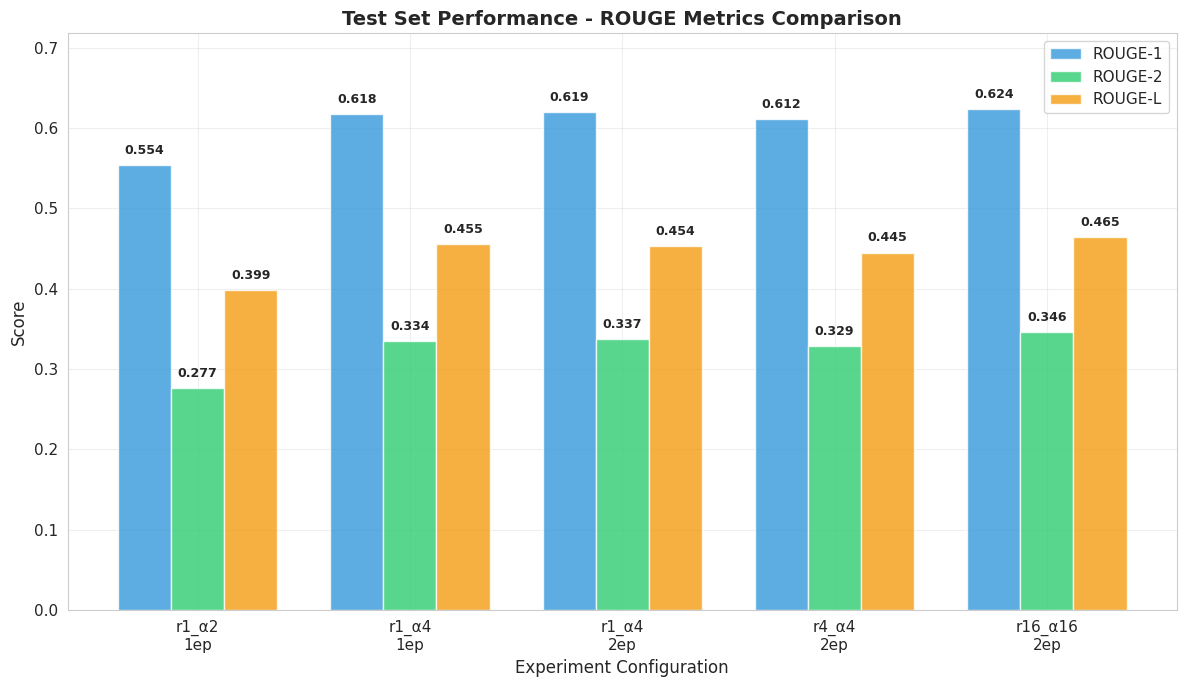


📊 Performance Summary:
Best ROUGE-1: 0.6242 (r16_alpha16_epochs2)
Best ROUGE-2: 0.3457 (r16_alpha16_epochs2)
Best ROUGE-L: 0.4648 (r16_alpha16_epochs2)
Best Avg ROUGE: 0.4782 (r16_alpha16_epochs2)


In [50]:
# Test Performance - Bar Chart Comparison
perf_df_clean = perf_df.dropna(subset=['Avg ROUGE']).copy()

plt.figure(figsize=(12, 7))

# Bar chart for all experiments side by side
x = np.arange(len(perf_df_clean))
width = 0.25

colors_rouge = ['#3498db', '#2ecc71', '#f39c12']  # Blue, Green, Orange

bars1 = plt.bar(x - width, perf_df_clean['ROUGE-1'], width, label='ROUGE-1', color=colors_rouge[0], alpha=0.8)
bars2 = plt.bar(x, perf_df_clean['ROUGE-2'], width, label='ROUGE-2', color=colors_rouge[1], alpha=0.8)
bars3 = plt.bar(x + width, perf_df_clean['ROUGE-L'], width, label='ROUGE-L', color=colors_rouge[2], alpha=0.8)

plt.xlabel('Experiment Configuration', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.title('Test Set Performance - ROUGE Metrics Comparison', fontsize=14, fontweight='bold')
plt.xticks(x, [f"r{r}_α{a}\n{e}ep" for r, a, e in zip(perf_df_clean['LoRA r'], perf_df_clean['LoRA α'], perf_df_clean['Epochs'])], rotation=0)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3, axis='y')
plt.ylim(0, max(perf_df_clean[['ROUGE-1', 'ROUGE-2', 'ROUGE-L']].max()) * 1.15)

# Add value labels on bars
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                f'{height:.3f}', ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\n📊 Performance Summary:")
print("=" * 50)
print(f"Best ROUGE-1: {perf_df_clean['ROUGE-1'].max():.4f} ({perf_df_clean.loc[perf_df_clean['ROUGE-1'].idxmax(), 'Experiment']})")
print(f"Best ROUGE-2: {perf_df_clean['ROUGE-2'].max():.4f} ({perf_df_clean.loc[perf_df_clean['ROUGE-2'].idxmax(), 'Experiment']})")
print(f"Best ROUGE-L: {perf_df_clean['ROUGE-L'].max():.4f} ({perf_df_clean.loc[perf_df_clean['ROUGE-L'].idxmax(), 'Experiment']})")
print(f"Best Avg ROUGE: {perf_df_clean['Avg ROUGE'].max():.4f} ({perf_df_clean.loc[perf_df_clean['Avg ROUGE'].idxmax(), 'Experiment']})")

## 📈 Training Loss Progression

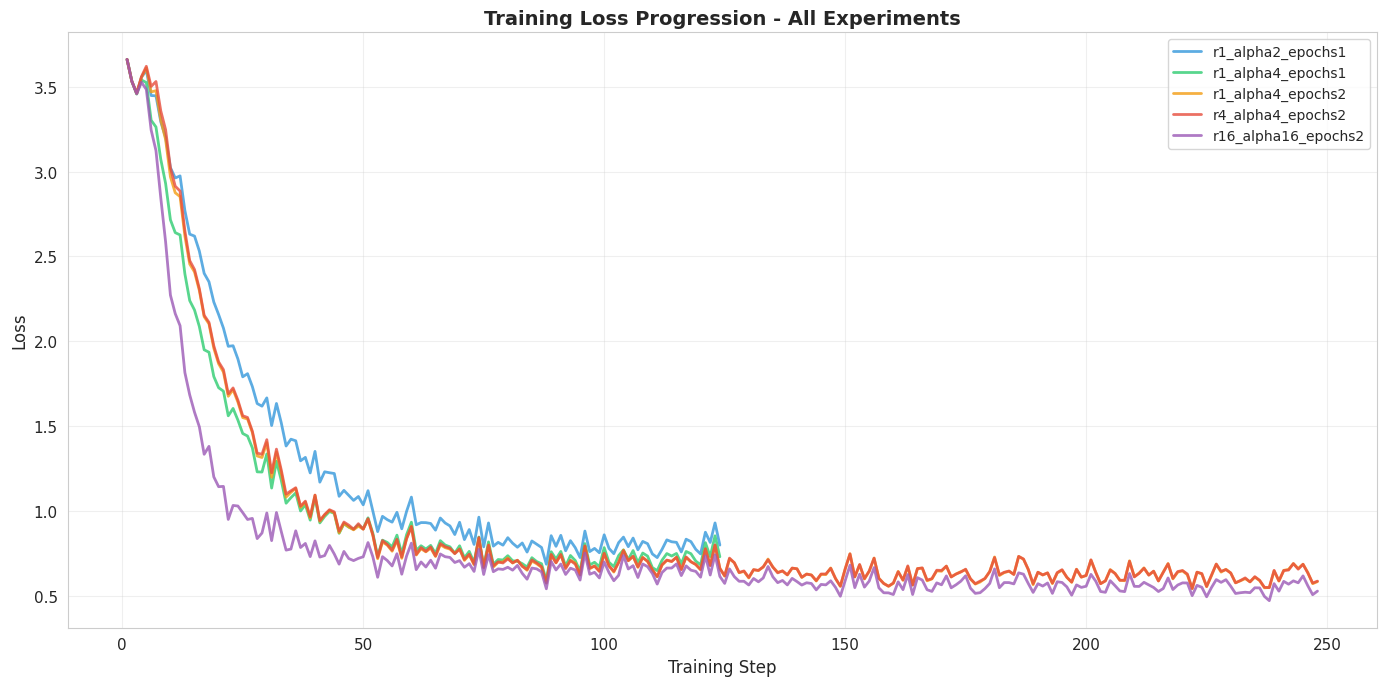


📊 Training Statistics Summary:
r1_alpha2_epochs1:
  Initial Loss: 3.6610 → Final Loss: 0.7986
  Reduction: 2.8624 (78.2%)

r1_alpha4_epochs1:
  Initial Loss: 3.6610 → Final Loss: 0.7300
  Reduction: 2.9310 (80.1%)

r1_alpha4_epochs2:
  Initial Loss: 3.6610 → Final Loss: 0.5833
  Reduction: 3.0777 (84.1%)

r4_alpha4_epochs2:
  Initial Loss: 3.6610 → Final Loss: 0.5863
  Reduction: 3.0747 (84.0%)

r16_alpha16_epochs2:
  Initial Loss: 3.6610 → Final Loss: 0.5275
  Reduction: 3.1335 (85.6%)



In [51]:
# Training Loss Comparison Across All Experiments
if training_logs:
    plt.figure(figsize=(14, 7))
    
    for train_log in training_logs:
        exp_name = train_log['experiment'].iloc[0]
        exp_color = train_log['color'].iloc[0]
        
        plt.plot(train_log['step'], train_log['loss'], 
                linewidth=2, alpha=0.8, label=exp_name, color=exp_color)
    
    plt.title('Training Loss Progression - All Experiments', fontsize=14, fontweight='bold')
    plt.xlabel('Training Step', fontsize=12)
    plt.ylabel('Loss', fontsize=12)
    plt.legend(fontsize=10, loc='best')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    # Print training statistics for each experiment
    print("\n📊 Training Statistics Summary:")
    print("=" * 70)
    for train_log in training_logs:
        exp_name = train_log['experiment'].iloc[0]
        initial_loss = train_log['loss'].iloc[0]
        final_loss = train_log['loss'].iloc[-1]
        loss_reduction = initial_loss - final_loss
        loss_reduction_pct = (loss_reduction / initial_loss) * 100
        
        print(f"{exp_name}:")
        print(f"  Initial Loss: {initial_loss:.4f} → Final Loss: {final_loss:.4f}")
        print(f"  Reduction: {loss_reduction:.4f} ({loss_reduction_pct:.1f}%)")
        print()
else:
    print("⚠️ No training logs available for visualization")

## 📊 Learning Rate Schedules

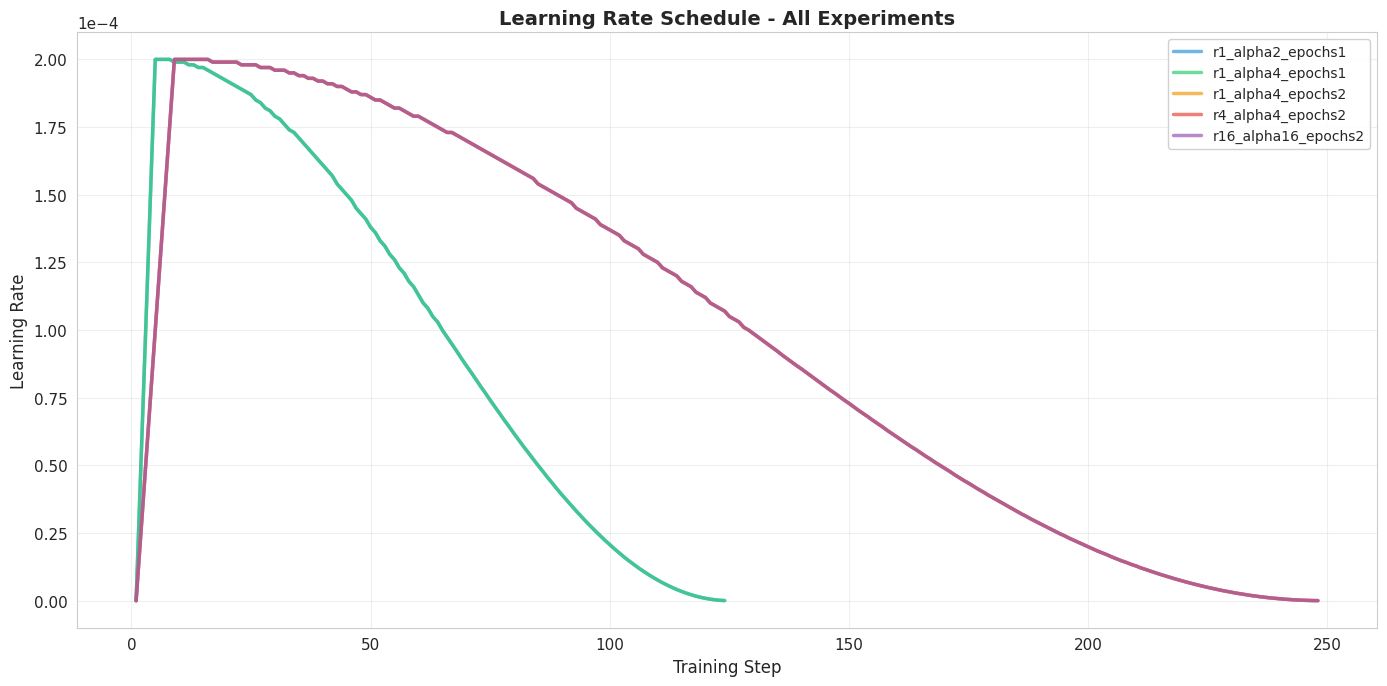


📊 Learning Rate Schedule Analysis:
⚠️  OVERLAPPING SCHEDULES DETECTED:

   These 2 experiments share the SAME learning rate schedule:
     • r1_alpha2_epochs1
     • r1_alpha4_epochs1

   These 3 experiments share the SAME learning rate schedule:
     • r16_alpha16_epochs2
     • r1_alpha4_epochs2
     • r4_alpha4_epochs2

   💡 This is expected for experiments with the same number of epochs!
      Different LoRA r and α values don't affect the LR schedule.

📈 Learning Rate Schedules by Training Duration:

124 training steps:
  • r1_alpha2_epochs1: max LR = 2.00e-04
  • r1_alpha4_epochs1: max LR = 2.00e-04

248 training steps:
  • r1_alpha4_epochs2: max LR = 2.00e-04
  • r4_alpha4_epochs2: max LR = 2.00e-04
  • r16_alpha16_epochs2: max LR = 2.00e-04


In [52]:
# Learning Rate Schedule Comparison
if training_logs:
    plt.figure(figsize=(14, 7))
    
    # Track unique LR schedules to identify overlapping experiments
    lr_schedules = {}
    
    for train_log in training_logs:
        exp_name = train_log['experiment'].iloc[0]
        exp_color = train_log['color'].iloc[0]
        
        # Create a unique key based on the LR schedule (rounded to avoid float comparison issues)
        lr_key = tuple(np.round(train_log['learning_rate'].values, 10))
        
        if lr_key not in lr_schedules:
            lr_schedules[lr_key] = []
        lr_schedules[lr_key].append(exp_name)
        
        plt.plot(train_log['step'], train_log['learning_rate'], 
                linewidth=2.5, alpha=0.7, label=exp_name, color=exp_color)
    
    plt.title('Learning Rate Schedule - All Experiments', fontsize=14, fontweight='bold')
    plt.xlabel('Training Step', fontsize=12)
    plt.ylabel('Learning Rate', fontsize=12)
    plt.legend(fontsize=10, loc='best', framealpha=0.9)
    plt.grid(True, alpha=0.3)
    plt.ticklabel_format(style='scientific', axis='y', scilimits=(0,0))
    plt.tight_layout()
    plt.show()
    
    # Print information about overlapping schedules
    print("\n📊 Learning Rate Schedule Analysis:")
    print("=" * 70)
    
    schedule_groups = {}
    for lr_key, exp_names in lr_schedules.items():
        if len(exp_names) > 1:
            # Multiple experiments share this schedule
            group_key = tuple(sorted(exp_names))
            if group_key not in schedule_groups:
                schedule_groups[group_key] = len(exp_names)
    
    if schedule_groups:
        print("⚠️  OVERLAPPING SCHEDULES DETECTED:")
        for group, count in schedule_groups.items():
            print(f"\n   These {count} experiments share the SAME learning rate schedule:")
            for exp in group:
                print(f"     • {exp}")
        print("\n   💡 This is expected for experiments with the same number of epochs!")
        print("      Different LoRA r and α values don't affect the LR schedule.")
    else:
        print("✅ All experiments have unique learning rate schedules")
    
    # Group by number of training steps (epochs)
    print("\n📈 Learning Rate Schedules by Training Duration:")
    print("=" * 70)
    step_groups = {}
    for train_log in training_logs:
        exp_name = train_log['experiment'].iloc[0]
        num_steps = len(train_log)
        max_lr = train_log['learning_rate'].max()
        
        if num_steps not in step_groups:
            step_groups[num_steps] = []
        step_groups[num_steps].append((exp_name, max_lr))
    
    for num_steps in sorted(step_groups.keys()):
        exps = step_groups[num_steps]
        print(f"\n{num_steps} training steps:")
        for exp_name, max_lr in exps:
            print(f"  • {exp_name}: max LR = {max_lr:.2e}")
            
else:
    print("⚠️ No training logs available for visualization")

## 🎯 Validation Performance During Training

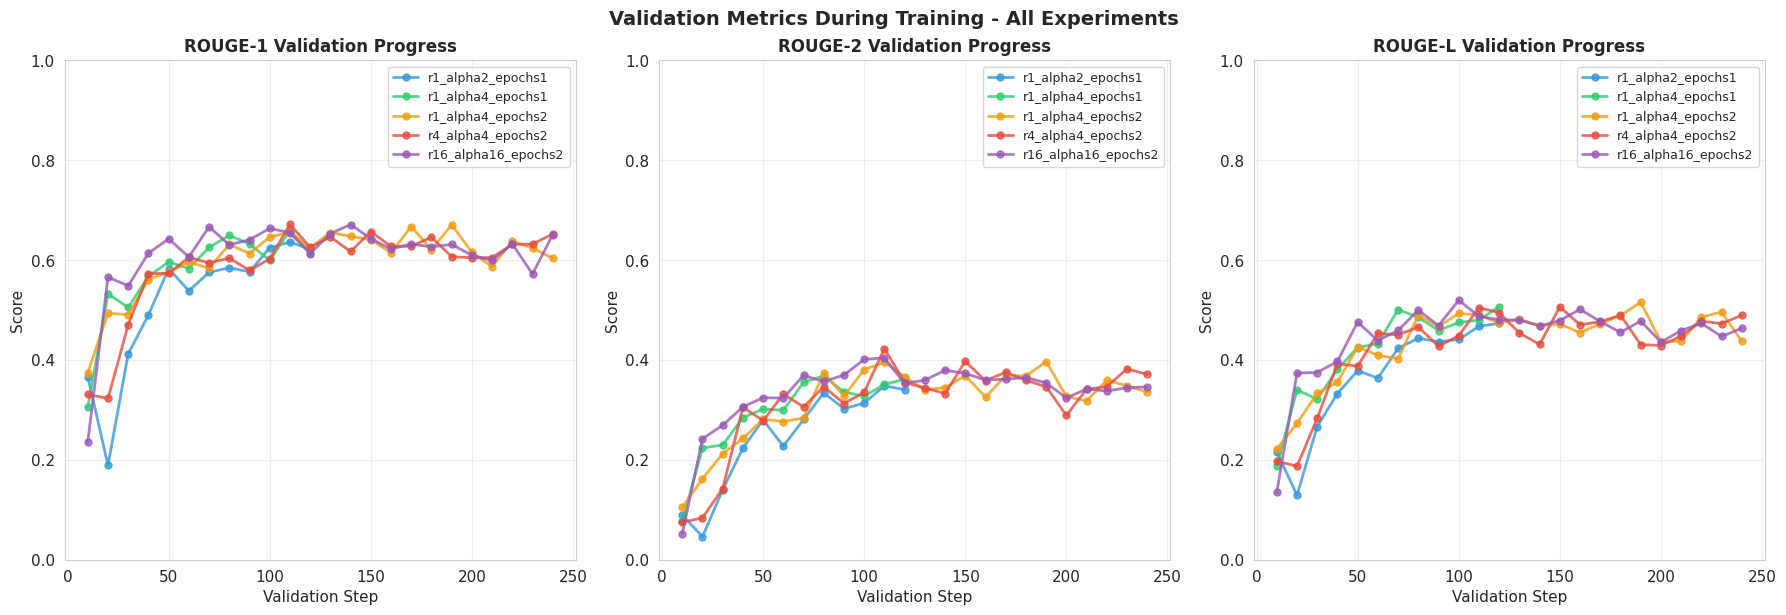


📊 Validation Summary:
r1_alpha2_epochs1:
  ROUGE1: 0.5165
  ROUGE2: 0.2439
  ROUGEL: 0.3643

r1_alpha4_epochs1:
  ROUGE1: 0.5725
  ROUGE2: 0.2930
  ROUGEL: 0.4162

r1_alpha4_epochs2:
  ROUGE1: 0.6013
  ROUGE2: 0.3170
  ROUGEL: 0.4367

r4_alpha4_epochs2:
  ROUGE1: 0.5878
  ROUGE2: 0.3141
  ROUGEL: 0.4278

r16_alpha16_epochs2:
  ROUGE1: 0.6094
  ROUGE2: 0.3341
  ROUGEL: 0.4470



In [53]:
# Validation Performance Comparison
validation_available = []

for exp_data in experiments_data:
    if exp_data['validation_log'] is not None:
        val_log = exp_data['validation_log']
        exp = exp_data['config']
        val_log['experiment'] = exp['name']
        val_log['color'] = exp['color']
        validation_available.append(val_log)

if validation_available:
    # Create subplot for all 3 ROUGE metrics
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    
    metrics = ['rouge1', 'rouge2', 'rougeL']
    titles = ['ROUGE-1 Validation Progress', 'ROUGE-2 Validation Progress', 'ROUGE-L Validation Progress']
    
    for idx, (metric, title) in enumerate(zip(metrics, titles)):
        for val_log in validation_available:
            exp_name = val_log['experiment'].iloc[0]
            exp_color = val_log['color'].iloc[0]
            
            if 'step' in val_log.columns:
                val_agg = val_log.groupby('step')[metric].mean().reset_index()
                axes[idx].plot(val_agg['step'], val_agg[metric], 
                             marker='o', linewidth=2, markersize=5, alpha=0.8, 
                             label=exp_name, color=exp_color)
            else:
                axes[idx].plot(val_log[metric], 
                             marker='o', linewidth=2, markersize=5, alpha=0.8, 
                             label=exp_name, color=exp_color)
        
        axes[idx].set_title(title, fontsize=12, fontweight='bold')
        axes[idx].set_xlabel('Validation Step' if 'step' in val_log.columns else 'Sample', fontsize=11)
        axes[idx].set_ylabel('Score', fontsize=11)
        axes[idx].legend(fontsize=9, loc='best')
        axes[idx].grid(True, alpha=0.3)
        axes[idx].set_ylim(0, 1)
    
    plt.tight_layout()
    plt.suptitle('Validation Metrics During Training - All Experiments', 
                fontsize=14, fontweight='bold', y=1.02)
    plt.show()
    
    # Print validation summary
    print("\n📊 Validation Summary:")
    print("=" * 70)
    for val_log in validation_available:
        exp_name = val_log['experiment'].iloc[0]
        print(f"{exp_name}:")
        for metric in ['rouge1', 'rouge2', 'rougeL']:
            if metric in val_log.columns:
                mean_val = val_log[metric].mean()
                print(f"  {metric.upper()}: {mean_val:.4f}")
        print()
else:
    print("⚠️ No validation data available")

## 💡 Best Configurations

In [54]:
# Find best configurations
if not perf_df_clean.empty:
    best_overall = perf_df_clean.loc[perf_df_clean['Avg ROUGE'].idxmax()]
    best_rouge1 = perf_df_clean.loc[perf_df_clean['ROUGE-1'].idxmax()]

    print("🏆 BEST PERFORMING CONFIGURATIONS:")
    print("=" * 60)

    print(f"🎯 Best Overall (Avg ROUGE): {best_overall['Experiment']}")
    print(f"   Configuration: r={best_overall['LoRA r']}, α={best_overall['LoRA α']}, epochs={best_overall['Epochs']}")
    print(f"   Avg ROUGE: {best_overall['Avg ROUGE']:.4f}")
    print()

    print(f"📈 Best ROUGE-1: {best_rouge1['Experiment']}")
    print(f"   Configuration: r={best_rouge1['LoRA r']}, α={best_rouge1['LoRA α']}, epochs={best_rouge1['Epochs']}")
    print(f"   ROUGE-1: {best_rouge1['ROUGE-1']:.4f}")
    print()

    # Performance trends analysis
    print("📊 PERFORMANCE TRENDS ANALYSIS:")
    print("=" * 60)

    # By LoRA rank
    rank_perf = perf_df_clean.groupby('LoRA r')['Avg ROUGE'].mean().sort_values(ascending=False)
    print(f"LoRA Rank Performance (higher is better):")
    for rank, score in rank_perf.items():
        print(f"   r={rank}: {score:.4f}")
    print()

    # By LoRA alpha
    alpha_perf = perf_df_clean.groupby('LoRA α')['Avg ROUGE'].mean().sort_values(ascending=False)
    print(f"LoRA Alpha Performance (higher is better):")
    for alpha, score in alpha_perf.items():
        print(f"   α={alpha}: {score:.4f}")
    print()

    # By epochs
    epoch_perf = perf_df_clean.groupby('Epochs')['Avg ROUGE'].mean().sort_values(ascending=False)
    print(f"Training Epochs Performance (higher is better):")
    for epochs, score in epoch_perf.items():
        print(f"   {epochs} epochs: {score:.4f}")
    print()

    # Key insights
    print("💡 KEY INSIGHTS:")
    print("=" * 60)

    # Best rank
    best_rank = rank_perf.index[0]
    print(f"• Best LoRA rank: r={best_rank} (avg ROUGE: {rank_perf.iloc[0]:.4f})")

    # Best alpha
    best_alpha = alpha_perf.index[0]
    print(f"• Best LoRA alpha: α={best_alpha} (avg ROUGE: {alpha_perf.iloc[0]:.4f})")

    # Best epochs
    best_epochs = epoch_perf.index[0]
    print(f"• Best training duration: {best_epochs} epochs (avg ROUGE: {epoch_perf.iloc[0]:.4f})")

    # Performance improvement over baseline (assuming first experiment is baseline)
    baseline_score = perf_df_clean['Avg ROUGE'].iloc[0]
    best_score = perf_df_clean['Avg ROUGE'].max()
    improvement = ((best_score - baseline_score) / baseline_score) * 100
    print(f"• Best improvement over baseline: {improvement:.1f}%")

    # Parameter efficiency analysis
    perf_df_clean['param_efficiency'] = perf_df_clean['Avg ROUGE'] / (perf_df_clean['LoRA r'] * perf_df_clean['LoRA α'])
    best_efficiency = perf_df_clean.loc[perf_df_clean['param_efficiency'].idxmax()]
    print(f"• Most parameter-efficient: {best_efficiency['Experiment']} (efficiency: {best_efficiency['param_efficiency']:.6f})")

else:
    print("❌ No performance data available for analysis")

🏆 BEST PERFORMING CONFIGURATIONS:
🎯 Best Overall (Avg ROUGE): r16_alpha16_epochs2
   Configuration: r=16, α=16, epochs=2
   Avg ROUGE: 0.4782

📈 Best ROUGE-1: r16_alpha16_epochs2
   Configuration: r=16, α=16, epochs=2
   ROUGE-1: 0.6242

📊 PERFORMANCE TRENDS ANALYSIS:
LoRA Rank Performance (higher is better):
   r=16: 0.4782
   r=4: 0.4618
   r=1: 0.4496

LoRA Alpha Performance (higher is better):
   α=16: 0.4782
   α=4: 0.4670
   α=2: 0.4096

Training Epochs Performance (higher is better):
   2 epochs: 0.4700
   1 epochs: 0.4394

💡 KEY INSIGHTS:
• Best LoRA rank: r=16 (avg ROUGE: 0.4782)
• Best LoRA alpha: α=16 (avg ROUGE: 0.4782)
• Best training duration: 2 epochs (avg ROUGE: 0.4700)
• Best improvement over baseline: 16.7%
• Most parameter-efficient: r1_alpha2_epochs1 (efficiency: 0.204825)
